# Classifying 2D Data with a Single Neuron

This notebook provides you with a complete code example that loads the data contained in `data_class_2d_clean.csv`, trains a neuron to classify it, and finally uses the trained neuron to predict the classification of the data in `data_class_2d_clean_test.csv`.

## Loading the Data

In [13]:
from loader import load_data

(x, y_gt) = load_data(filename="data_class_2d_clean.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [[ 1.13210319 -1.4066463 ]
 [-1.09042665  1.92715243]
 [-0.76551909 -0.14404298]
 [ 0.12162179 -0.78994452]
 [-0.47511814 -1.61110253]
 [ 0.22451311  0.54315986]
 [-0.2498135   0.0686202 ]
 [ 0.95858174  1.26612468]
 [ 1.94770422  0.88129908]
 [-0.23942295  0.49355215]
 [-0.86684561  0.32131904]
 [-0.23114367  1.44038263]
 [-0.40099583 -0.26931807]
 [ 1.35830369  0.1398443 ]
 [-1.50464579 -0.58452625]
 [ 0.15401177  1.41957166]
 [ 1.18233301 -0.05716118]
 [ 0.48304064 -1.01761707]
 [ 0.19611033 -2.0721155 ]
 [-0.54700911 -0.15378581]]
y_gt: [[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]]


# Visualizing the Data

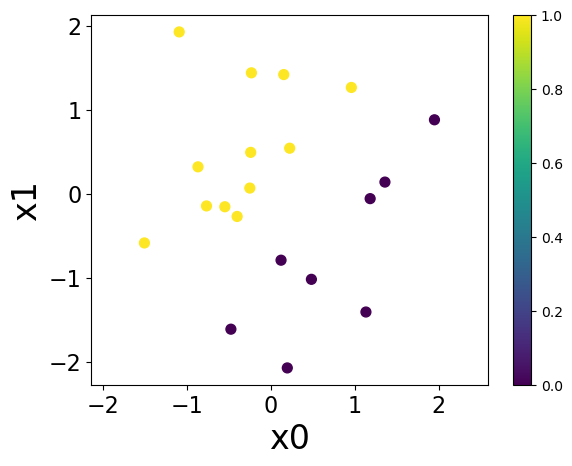

In [14]:
from plotting import plot_data_2d

plot_data_2d(x, y_gt)

## Implementing a Neuron with Multiple Inputs

Create a single neuron with one vectorial weigth `w` and one vectorial input `x` (which can also be a 2D numpy vector if there are multiple imput vectors) ...

In [15]:
def neuron_clas_2d(w, x):
    """Artificial neuron for multidimensional classification.""" 
    return (x @ w > 0).astype(int)

... randomly initialize its weight vector ...

In [16]:
from numpy.random import default_rng

rng = default_rng()
w = rng.standard_normal(size=(2,))

... obtain its prediction `y_p` for the input data (which has the same shape as `x`) ...

In [17]:
y_p = neuron_clas_2d(w, x)

... and visualize its predictions.

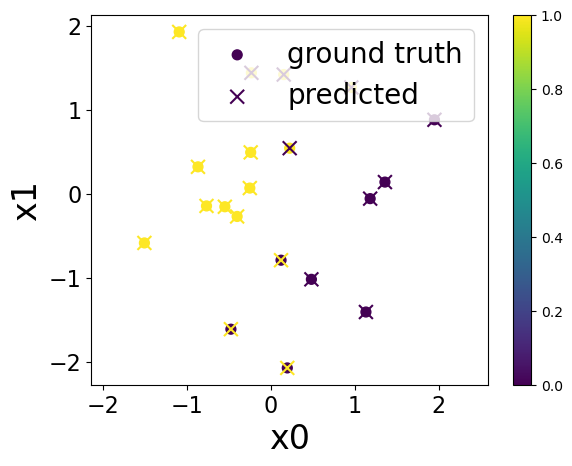

In [18]:
from plotting import plot_pred_2d

plot_pred_2d(x, y_gt, y_p=neuron_clas_2d(w, x))

## Training the Neuron

Train the neuron ...

In [19]:
num_samples = len(x)
num_train_iterations = 100
eta = .1  # Learning rate.

for i in range(num_train_iterations):
    selected = rng.integers(0, num_samples) # Select random sample. 
    x_selected = x[selected]
    y_gt_selected = y_gt[selected]
    
    y_p_selected = neuron_clas_2d(w, x_selected)  # Neuron prediction.
    
    error = y_p_selected - y_gt_selected  # Calculate error.
    
    w -= eta * error * x_selected  # Update neuron weight.

    print(f"i={i} w0={w[0]:.2f} w1={w[1]:.2f} error={error[0]:.2f}")

i=0 w0=-0.31 w1=-0.08 error=-1.00
i=1 w0=-0.21 w1=0.04 error=-1.00
i=2 w0=-0.21 w1=0.04 error=0.00
i=3 w0=-0.19 w1=0.10 error=-1.00
i=4 w0=-0.19 w1=0.10 error=0.00
i=5 w0=-0.19 w1=0.10 error=0.00
i=6 w0=-0.19 w1=0.10 error=0.00
i=7 w0=-0.19 w1=0.10 error=0.00
i=8 w0=-0.19 w1=0.10 error=0.00
i=9 w0=-0.19 w1=0.10 error=0.00
i=10 w0=-0.19 w1=0.10 error=0.00
i=11 w0=-0.19 w1=0.10 error=0.00
i=12 w0=-0.19 w1=0.10 error=0.00
i=13 w0=-0.19 w1=0.10 error=0.00
i=14 w0=-0.19 w1=0.10 error=0.00
i=15 w0=-0.19 w1=0.10 error=0.00
i=16 w0=-0.19 w1=0.10 error=0.00
i=17 w0=-0.09 w1=0.22 error=-1.00
i=18 w0=-0.29 w1=0.14 error=1.00
i=19 w0=-0.29 w1=0.14 error=0.00
i=20 w0=-0.29 w1=0.14 error=0.00
i=21 w0=-0.19 w1=0.26 error=-1.00
i=22 w0=-0.19 w1=0.26 error=0.00
i=23 w0=-0.19 w1=0.26 error=0.00
i=24 w0=-0.19 w1=0.26 error=0.00
i=25 w0=-0.19 w1=0.26 error=0.00
i=26 w0=-0.19 w1=0.26 error=0.00
i=27 w0=-0.19 w1=0.26 error=0.00
i=28 w0=-0.19 w1=0.26 error=0.00
i=29 w0=-0.19 w1=0.26 error=0.00
i=30 w0=-0.19 

... and plot its performance.

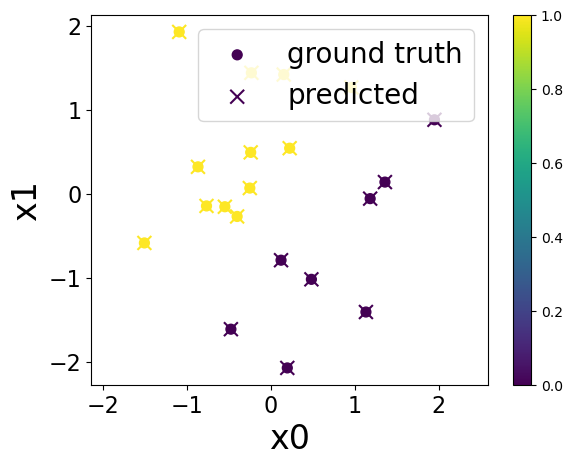

In [20]:
plot_pred_2d(x, y_gt, y_p=neuron_clas_2d(w, x))

## Testing the Trained Neuron

Check how the trained neuron works on the test data.

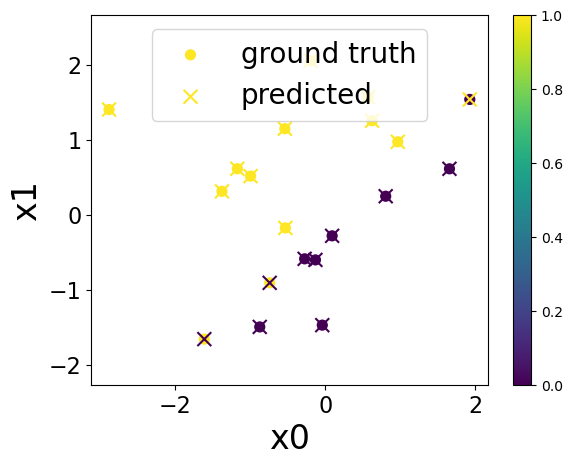

In [21]:
(x_test, y_gt_test) = load_data(filename="data_class_2d_clean_test.csv")

plot_pred_2d(x_test, y_gt_test, y_p=neuron_clas_2d(w, x_test))